# _Acoustic Modeling Program_

## Python Modules

In [1]:
import time
import matplotlib.pyplot as pl
import numpy as np
import multiprocessing as mp

## Created Modules 

In [2]:
import parametro
import auxfunctionsmodule as aux
import fortransubroutines as fortran

## Beginning of the Acoustic Modeling Program

In [3]:
# This variable will tell fortran that we want to do the modeling of the seismograms 

regTTM = 0

start_time = time.time()

## Velocity Model

### Loads and plots the velocity model that will be modeling

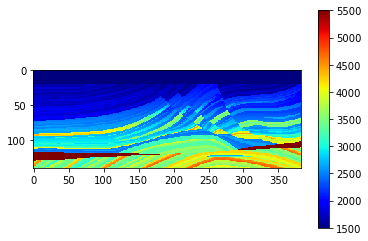

In [4]:
C = aux.readbinaryfile(parametro.Nz,parametro.Nx,parametro.modeloreal)
aux.plotmodel(C,'jet')
pl.show()

## Seismic Source 

### Creates and plots the seismic source that will be used

In [5]:
# Creates the wavelet
fortran.wavelet(1,parametro.dt,1,parametro.f_corte) 

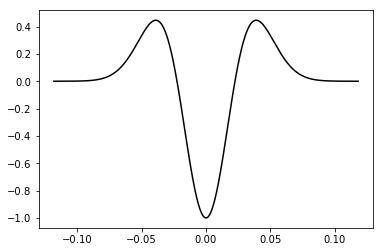

In [6]:
# plots the created wavelet 
aux.plotgraphics(2,'wavelet_ricker.dat', 'k') 
pl.show()

### Defines the source's samples

In [7]:
lixo, fonte = np.loadtxt('wavelet_ricker.dat', unpack = True)
Nfonte      = np.size(fonte)

### Defines the source positions

#### Creates the file with the source positions

In [ ]:
if parametro.gera_pos_fonte: 
    aux.posicao_fonte(parametro.Nz,parametro.Nx,parametro.N_shot,parametro.Fx0,parametro.Fz0,parametro.SpaFonte)

#### Loads the file created

In [ ]:
Fx, Fz = np.loadtxt('posicoes_fonte.dat',dtype = 'int',unpack = True)
N_shot = np.size(Fx)

print(N_shot)

## Cerjan Condition

### Creates and plots the damping function 

In [8]:
# Creates the damping function
func_amort = aux.amort(parametro.fat,parametro.nat)

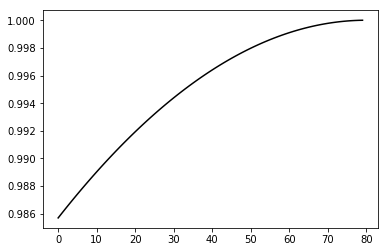

In [9]:
# plots the created function
aux.plotgraphics(1,'f_amort.dat','k')
pl.show()

## Acoustic Modeling

### Here we are going to divide the problem in two cases: If we have only one shot and if we have multiple shots.

#### One shot

In [ ]:
# Case 1: Only one shot
if N_shot == 1:
    print("Fx =", Fx, "Fz =", Fz, "shot",N_shot)
    fortran.nucleomodelagem(parametro.Nz,parametro.Nx,parametro.Nt,\
                                parametro.h,parametro.dt,parametro.nat,\
                                N_shot,parametro.shotshow,\
                                Fx,Fz,fonte,parametro.Nsnap,regTTM,\
                                parametro.modeloreal,parametro.sismogramaobservado,\
                                parametro.nome_prin,\
                                parametro.zr,)
    print(" shot= ",shot," Finalizado.")

#### Multiple Shots

In [ ]:
else: 
    procs = []    
    for shot in np.arange(0,N_shot):
        proc = mp.Process(target=aux.modelagemparalela, \
        args=(shot+1,\
        Fx[shot],\
        Fz[shot],\
        fonte,\
        regTTM,\
        parametro.sismogramaobservado,\
        parametro.modeloreal,\
        parametro.nome_prin))

        procs.append(proc)
        proc.start()
    
    for proc in procs:
        proc.join()

## Finishing the program

In [ ]:
elapsed_time_python = time.time() - start_time
print ("Tempo de processamento python = ", elapsed_time_python, "s")